Author: Viet Tien Nguyen

Date: 31/08/2022


Environment: Python

Libraries used:
* os
* re 
* pandas
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Reading all text files](#reading) <br>
[4. Getting values by regex](#parse) <br>
$\;\;\;\;$[4.1. Getting all product IDs](#product_id) <br>
$\;\;\;\;$[4.2. Getting all reviews data for each product IDs](#review) <br>
[5. Writing to an CSV File](#write) <br>
[6. Conclusion](#conclusion) <br>
[7. References](#Ref) <br>

-------------------------------------

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

This project is about extracting data from 500 semi-structured text files which have information about user reviews on website with html language. We have to use regular expression to get data for exporting to xml files.

-------------------------------------

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

* **os:** to go to the directory that have 500 text files and get all the file names
* **re:** to define and use regular expressions
* **pandas:** to read and write csv file

In [6]:
import re
import os
import pandas as pd

-------------------------------------

<div class="alert alert-block alert-warning">

## 3. Reading all text files  <a class="anchor" name="reading"></a>

 </div>

In [7]:
# getting all the files' name
fileNames = os.listdir("data/")
# to store all content of every files
allFiles = []
for name in fileNames:
  filePath = 'data/' + name
  f = open(filePath, 'r')
  content = f.read()
  allFiles.append(content)
  
print("The number of files is:",len(allFiles))

The number of files is: 500


As seem all above output, all the 500 files is read. Then I put every contents into one string for finding all product id later.

In [8]:
allContent = ""
for c in allFiles:
  con = c
  allContent += c

After looking through the files, the following observations were made:
* There are different pattern for each product id, product review heading
* The data is structured as HTML code
* For each product ID, there are multiple reviews
* Product Id and Review is \<h1\> style



-------------------------------------

<div class="alert alert-block alert-warning"> 

## 4.  Getting values by regex <a class="anchor" name="parse"></a>

</div>

In this part, I will use regular expression to get all the heading for getting required value later by regular expression. Therefore, we can know different type of pattern for information we need.

The picture about regex I generated by regexer from
https://regexper.com/

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.1. Getting all product IDs<a class="anchor" name="product_id"></a>

The below regular expression will help us to find all product id and product review types.

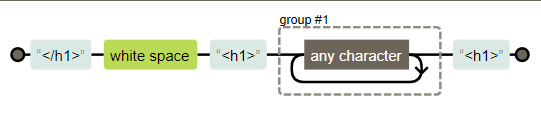

After observing the text files, I saw the product id is usually wrap around above pattern. Then I can check the length to see if it get all the product id title. If it is 500 then we know that all the product id has above pattern.

Then from above, we can use below regex to get all the product ID
The regex pattern is explained below:
* \<\h1\> for matching \<\h1\>
* \s for newline character which is the end of line for above \<\h1\>
* \<h1\>(.+)\<h1\> for getting everything that wrapped around \<h1\> after the above patterns

In [9]:
# find all product_id 
product_id = re.findall(r"</h1>\s<h1>(.+)<h1>", allContent)
# checking if getting all the product id rows
print("Number of product IDs heading we got:", len(product_id))
# get all the unique value of product id then we can know that all 500 values
# get above is product id and not other heading
print("All product id heading versions: ",set(product_id))

Number of product IDs heading we got: 500
All product id heading versions:  {' Product ID ', ' PRODUCT_ID ', ' PRODUCT.ID '}


From above, we can see that the product id has 3 versions and we know that we all the heading as the number of value we got is 500 (same as number of files and all the values are below versions by using set().


*   PRODUCT_ID
*   PRODUCT.ID
*   Product ID


Then from above versions, we know that they all start with P and end with ID. Then we can have below regular expression.

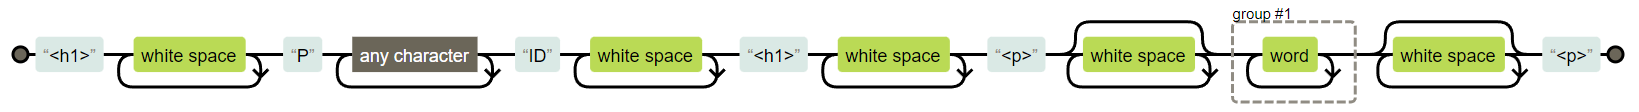

The first part **\<h1\>\s+P.+ID\s+\<h1\>\s+** is the pattern of the heading of the product id that we got from above which all 3 versions of product id wrap around \<h1\> and white space. We know that they all start with P and end with ID so we can get only Product ID and do not get the product review.

The second part **\s+\<p\>\s\*(\w+)\s\*\<p\>** is after the heading which as following:
* **\s+<p\>** for any newline and space until it reachs \<p\> as after the heading it go to nextline for the product id.
* the ids are wrapped around space and \<p\> so I use **\<p\>\s\*(\w+)\s*\<p\>** to get the ids and \w+ is alphanumeric so we can get the IDs. Only word part is in the group so I only get the product IDs without space.

In [10]:
product_id_val = re.findall(r"<h1>\s+P.+ID\s+<h1>\s+<p>\s*(\w+)\s*<p>", allContent)
# checking if getting all product id 
print("The number of product IDs we got is:",len(product_id_val))
# check if the product ids are unique
print("The number of unique product IDs we got is:",len(set(product_id_val)))
# check first 10 product ids
print("First 10 product IDs:",product_id_val[0:10])

The number of product IDs we got is: 500
The number of unique product IDs we got is: 500
First 10 product IDs: ['B00004Y7CF', 'B000165512', 'B005DCOQ8W', 'B005R4AXBK', 'B005SXT6RW', 'B0069VXRLS', 'B0069VYPV4', 'B006GM56N2', 'B006HIKIP6', 'B006N5C0O0']


As seen above, we can see that we got all 500 product IDs and we can assume the regex is correct for now.

-------------------------------------

<div class="alert alert-block alert-info">
    
### 4.2. Getting all reviews data for each product IDs <a class="anchor" name="review"></a>

The next tags is getting all data. At first I intend to get by getting all information below Product Review tags but I found out that going through all file (I got at the start before) and apply regex for each files is easier. For each file has one product ID but it gots multiple reviews text, review summary and review date. Thus it is easier to loop through files and use regex to get all review data for each files. 

First I have to find all versions of the heading for the reviews. After going through file content, I find out that the review is wrapped around \<h2> so I have below regex to get all the versions of review text, review date and review summary.

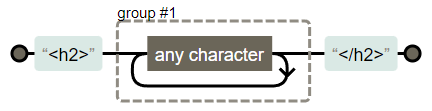

As aforementioned, the review summary, review text, review date are wrapped around \<h2> and \</h2> and the group to collect I use (.+) to the heading. 

In [11]:
# find all content within <h2> </h2>
h_2 = re.findall(r"<h2>(.+)</h2>", allContent)
print("The unique sub headings are:\n", set(h_2))

The unique sub headings are:
 {'Sub Heading', ' REVIEW DATE ', ' review.summary ', ' review.text ', ' REVIEW TEXT ', ' review.date ', ' REVIEW SUMMARY '}


As seen above printing, we know that Sub heading is not the heading for the review data. Thus, we can know that for each summary, text and date; they has 3 versions each.

I use following regular expression for each cases:

Review Date:
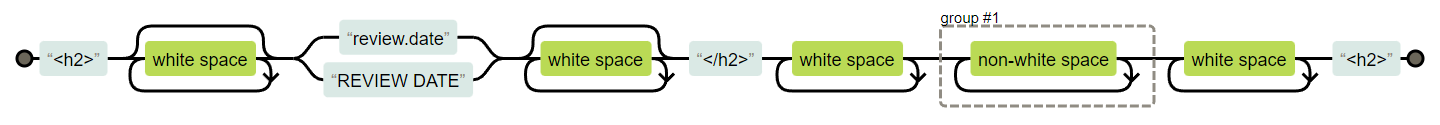

After knowing all the sub-heading for each review data. We can have above regex.
* The first part is **\<h2>\s*(?:review\\.date|REVIEW DATE)\s*\</h2>** as we know there are two version for review date. They are wrapped around \<h2> and space. I use | for the regex can choose either review.date and REVIEW DATE.
* The second part is **\s*\</h2>\s+(\S+)\s+\<h2>** for the next line which have the date. It has space around the date. The date I use \S for non-white space so it does not take other space and it end with \<h2>. \S is wrapped around () as we only need that content. 


Review Text:
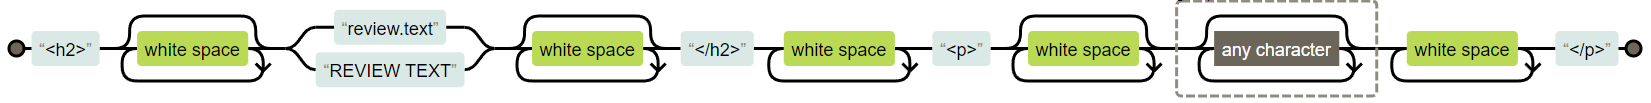

The first part is the same as review date, but the next part is different as the content of the review text and review summary is wrapped around **\<p>** so we have to have different pattern for this. After white space for new line then the content review text we want is wrapped around \<p> and \</p> with white space so I use **\<p>\s\*(.*)\s+\</p>** to get the content. 
* s\* and s+ are for space
* (.*) mean any character 0 or more times

Review Summary:
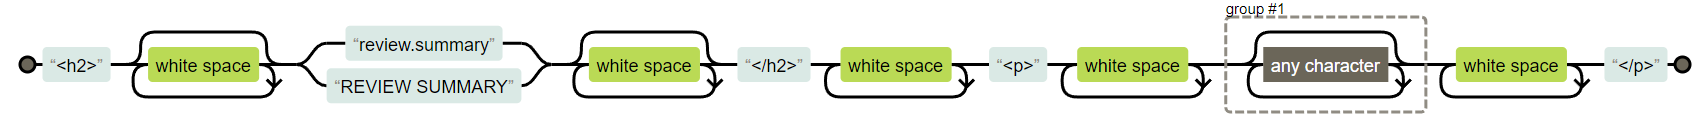

The review summary and review is exactly the same except for the sub-heading part.

With above regular expression, I use for loop to find all the review data for each file by looping through the file which I put each file content as element of the list at the first step.

In [12]:
review_dates = []
review_texts = []
review_sums = []
for f in allFiles:
  # apply regex to find all review date of each file
  date = re.findall(r"<h2>\s*(?:review\.date|REVIEW DATE)\s*</h2>\s+(\S+)\s+<h2>", f)
  # apply regex to find all review text of each file
  text = re.findall(r"<h2>\s*(?:review\.text|REVIEW TEXT)\s*</h2>\s+<p>\s*(.*)\s+</p>", f)
  # apply regex to find all review summary of each file
  summary = re.findall(r"<h2>\s*(?:review\.summary|REVIEW SUMMARY)\s*</h2>\s+<p>\s+(.*)\s+</p>", f)
  # then append each into lists as one element of the list as each file reviews
  review_dates.append(date)
  review_texts.append(text)
  review_sums.append(summary)

print("Review date of first product IDs:",review_dates[0])
print("Review text of first product IDs:",review_texts[0])
print("Review summary of first product IDs:",review_sums[0])

Review date of first product IDs: ['03-09-2001', '03-14-2001', '08-29-2001', '03-06-2002', '09-06-2001', '12-26-2001', '06-12-2001', '06-14-2002', '10-10-2001', '03-08-2001', '09-03-2001']
Review text of first product IDs: ["I've been in the market for a good MP3 player for a few months now, and after looking at all the reviews posted here (which you are doing now!) I decided on the HipZip, and I'm very glad I did.After looking at the prices for memory expansion for other models, I was shocked at how expensive it was, but then I came across this and was amazed at how cheap the media was.When I bought it and pluged in my own headphones, I was *AMAZED* at the sound quality...I truly never expected what i heard. Set up was a breeze, and really isn't even necessary if you already have an Iomega USB Zip or Jaz Drive.The cons that others mention are there: 1) the rewind takes you to the previous track, not to the beginning of the current track, 2) the backlight doesn't light long enough, and

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 5.  Parsing text file<a class="anchor" name="write"></a>

</div>

After getting all the required data, we need function to find the latest review date as we only show the latest review date of the review for each product id. 

In [13]:
def get_latest_date(dateList):
  """
  This function is used to getting the latest date from the given list of date.
  """
  # initialize the latest date as first date
  latest_date = dateList[0]
  for date in dateList:
    # change to format [mm,dd,yyyy]
    date_split = date.split("-")
    ld_split = latest_date.split("-")
    # mix it to string as "yyyymmdd" dd is day, mm is month, yyyy is year
    new_date = date_split[2] + date_split[0] + date_split[1]
    ldate = ld_split[2] + ld_split[0] + ld_split[1]
    # then change it to integer for comparing
    new_date = int(new_date)
    ldate = int(ldate)
    # if current looking date is larger than the stored latest date then 
    # make it as new latest date
    if new_date > ldate:
      latest_date = date
  latest_date_split = latest_date.split("-")
  # format it as new format as sample output (from mm-dd-yyyy to dd/mm/yyyy)
  output = latest_date_split[1] + "/" + latest_date_split[0] + "/" + latest_date_split[2]
  return output

Then I use for loop to go through the product id list, review text list, review sum list and review dates list for each file then mix it together as one row then add it to matrix final_table.

In [14]:
final_table = []
for i in range(len(product_id_val)):
  # generate row
  row = []
  # put each value to row
  row.append(product_id_val[i])
  row.append(review_texts[i])
  row.append(review_sums[i])
  row.append(get_latest_date(review_dates[i]))
  # then add row with above element to the matrix
  final_table.append(row)

# use pd to create data frame with column name same as sample output
output = pd.DataFrame(final_table, columns = ['PID', 'product_review', 'review_summary', 'latest_review_date'])
output.to_csv('parsed_data.csv', index = False)

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 6. Conclusion <a class="anchor" name="conclusion"></a>

</div>

In order to complete this evaluation, data must be extracted from 500 semi-structured text files including information about user reviews on html-based websites. For the purpose of exporting data to xml files, regular expression is required. We have to first find all version of the tags by regex so we can find locations of the content to find. Then use regex to get data with for loop for each file as the file is set up as multiple files in this case.

-------------------------------------

<div class="alert alert-block alert-warning"> 

## 7. References <a class="anchor" name="Ref"></a>

</div>

[1] Regex pictures generator. https://regexper.com/, Accessed 26/08/2022